In [8]:
# import dirive from google.colab  using for read file csv with pandas
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
# Nhóm 1
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture



# Đọc dữ liệu từ file CSV (giả sử file có cột "Date" và "Close")
data=pd.read_csv('/content/HPG-Historical-Data.csv')
data

,Date,Close,Open,High,Low,Vol.,Change %
0,12/1/2017,10432,10344,10483,10307,16.74M,0.73%
1,12/4/2017,10558,10407,10583,10382,16.96M,1.20%
2,12/5/2017,10458,10558,10621,10458,21.66M,-0.95%
3,12/6/2017,10621,10533,10621,10206,27.49M,1.56%
4,12/7/2017,10546,10621,10634,10458,15.14M,-0.71%
...,...,...,...,...,...,...,...
1369,6/1/2023,21400,21150,21400,21050,10.84M,0.94%
1370,6/2/2023,21600,21500,21800,21450,18.87M,0.93%
1371,6/5/2023,21650,21800,22050,21600,20.04M,0.23%
1372,6/6/2023,21750,21700,21850,21550,11.80M,0.46%


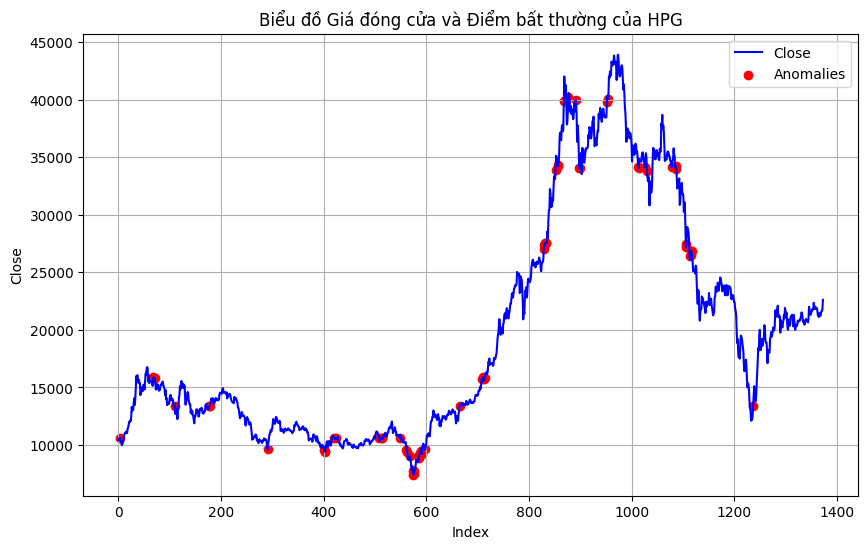

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# Chuyển đổi cột "Ngày" thành định dạng ngày
# data['Ngày'] = pd.to_datetime(data['Ngày'])

# Chuẩn bị dữ liệu đầu vào
X = data['Close'].values.reshape(-1, 1)
X

# Xây dựng mô hình LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Phát hiện điểm bất thường
outliers = lof.fit_predict(X)
# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], color='blue', label='Close')

# Đánh dấu các điểm bất thường
plt.scatter(data.index[outliers == -1], data['Close'][outliers == -1], color='red', label='Anomalies')

plt.xlabel('Index')
plt.ylabel('Close')
plt.title('Biểu đồ Giá đóng cửa và Điểm bất thường của HPG')
plt.grid(True)
plt.legend()
plt.show()
